### Predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Read The Dataset
cols=['age','workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race',
      'sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data = pd.read_csv('adult.data',names = cols)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
## Find if dataset is balanced
data.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [7]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [8]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race:  Amer-Indian-Eskimo, sex:  Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race:  Amer-Indian-Eskimo, sex:  Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race:  Asian-Pac-Islander, sex:  Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race:  Asian-Pac-Islander, sex:  Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race:  Black, sex:  Female
count    1555.000000
mean       37.854019
std        12.637197
min       

In [9]:
import seaborn as sns

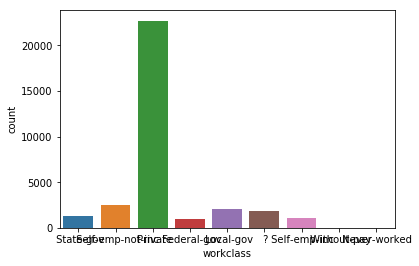

In [10]:
sns.countplot(data['workclass'])

In [11]:
df_wc = pd.get_dummies(data = data['workclass'],prefix='wc',drop_first=True)
df_wc.head(2)

,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0


In [12]:
df_ed = pd.get_dummies(data = data['education'],prefix='ed',drop_first=True)
df_ed.head(2)

,ed_ 11th,ed_ 12th,ed_ 1st-4th,ed_ 5th-6th,ed_ 7th-8th,ed_ 9th,ed_ Assoc-acdm,ed_ Assoc-voc,ed_ Bachelors,ed_ Doctorate,ed_ HS-grad,ed_ Masters,ed_ Preschool,ed_ Prof-school,ed_ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
df_ms = pd.get_dummies(data = data['marital-status'],prefix='ms',drop_first=True)
df_ms.head(2)

,ms_ Married-AF-spouse,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0


In [14]:
data.occupation.value_counts()
df_occu = pd.get_dummies(data = data['occupation'],prefix='occu',drop_first=True)
df_occu.head(2)

,occu_ Adm-clerical,occu_ Armed-Forces,occu_ Craft-repair,occu_ Exec-managerial,occu_ Farming-fishing,occu_ Handlers-cleaners,occu_ Machine-op-inspct,occu_ Other-service,occu_ Priv-house-serv,occu_ Prof-specialty,occu_ Protective-serv,occu_ Sales,occu_ Tech-support,occu_ Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
df_rel = pd.get_dummies(data = data['relationship'],prefix='rel',drop_first=True)
df_rel.head(2)

,rel_ Not-in-family,rel_ Other-relative,rel_ Own-child,rel_ Unmarried,rel_ Wife
0,1,0,0,0,0
1,0,0,0,0,0


In [16]:
df_race = pd.get_dummies(data = data['race'],prefix='race',drop_first=True)
df_race.head(2)

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,1
1,0,0,0,1


In [17]:
df_sex = pd.get_dummies(data = data['sex'],prefix='sex',drop_first=True)
df_sex.head(2)

,sex_ Male
0,1
1,1


In [18]:
df_country = pd.get_dummies(data = data['native-country'],prefix='native-country',drop_first=True)
df_country.head(2)

,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
data['salary'] = data['salary'].str.strip()
data['salary'] = np.where(data['salary']=='<=50K',0,1)

In [20]:
y=data['salary']

In [21]:
data.drop(['salary'],axis=1, inplace=True)

In [22]:
data.drop(['workclass','education','marital-status','occupation','race','sex','native-country'],axis=1, inplace=True)

In [23]:
data.head(2)

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week
0,39,77516,13,Not-in-family,2174,0,40
1,50,83311,13,Husband,0,0,13


In [24]:
df = pd.concat([data,df_wc,df_ed,df_ms,df_occu,df_rel,df_race,df_sex,df_country],axis=1)

In [25]:
df.head(2)

,age,fnlwgt,education-num,relationship,capital-gain,capital-loss,hours-per-week,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,Not-in-family,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Husband,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
X=df.drop('relationship',axis=1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=100)

### Apply Model

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [35]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dt_predictions = dtree.predict(X_test)

In [38]:
dt_confusion = confusion_matrix(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [39]:
dt_confusion

array([[6526,  902],
       [ 868, 1473]], dtype=int64)

In [43]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7428
           1       0.62      0.63      0.62      2341

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [44]:
dt_accuracy

0.8188146176681339

# RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', n_jobs = -1)

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rfc_predictions = rfc.predict(X_test)

In [50]:
rfc_confusion = confusion_matrix(y_test,rfc_predictions)
rfc_accuracy = accuracy_score(y_test,rfc_predictions)

In [51]:
rfc_confusion

array([[6905,  523],
       [ 955, 1386]], dtype=int64)

In [52]:
rfc_accuracy

0.8487050875217524

# RANDOM FOREST CLASSIFIER - CROSS_VAL_SCORE

In [55]:
rfcscore = cross_val_score(rfc,X,y,cv=10)
rfcscore

array([0.84034387, 0.84889435, 0.8507371 , 0.83753071, 0.8544226 ,
       0.84674447, 0.84920147, 0.84797297, 0.84797297, 0.8507371 ])

In [56]:
np.mean(rfcscore)

0.8474557633945107

# KNN - K Nearest Neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier() 

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
knn_predictions = knn.predict(X_test)

In [62]:
knn_confusion = confusion_matrix(y_test,knn_predictions)
knn_accuracy = accuracy_score(y_test,knn_predictions)

In [63]:
knn_accuracy

0.7812468011055379

# Choosing K value

In [64]:
error_rate=[]
for i in range(1,55):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

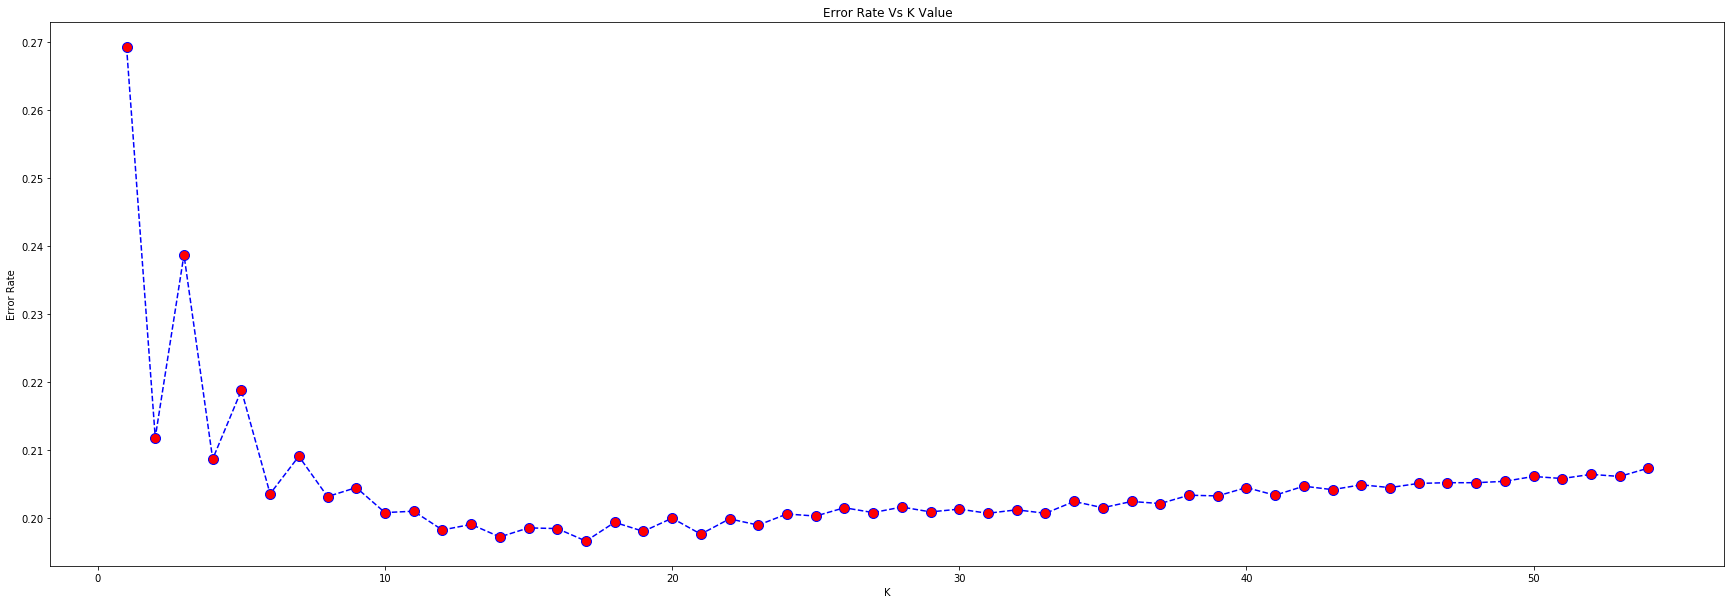

In [67]:
plt.figure(figsize=(30,10))
plt.plot(range(1,55), error_rate,color='blue', linestyle='dashed', marker = 'o',markerfacecolor = 'red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
acc_rate=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score4 = cross_val_score(knn,X,y,cv=10)
    acc_rate.append(score4.mean())

Text(0, 0.5, 'Accuracy Rate')

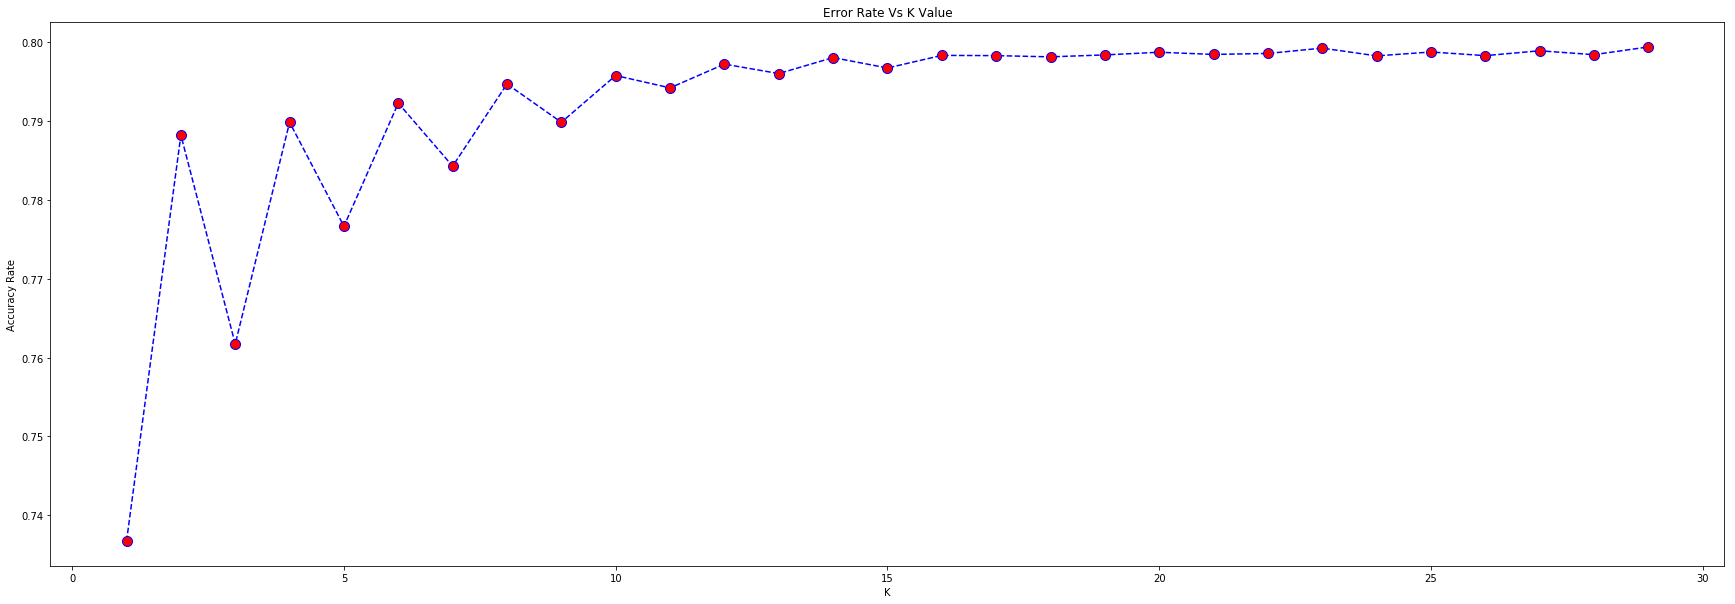

In [71]:
plt.figure(figsize=(30,10))
plt.plot(range(1,30), acc_rate,color='blue', linestyle='dashed', marker = 'o',markerfacecolor = 'red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [87]:
knn1 = KNeighborsClassifier(n_neighbors= 12)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [88]:
knn1_predictions = knn1.predict(X_test)
knn1_confusion = confusion_matrix(y_test,knn1_predictions)
knn1_accuracy = accuracy_score(y_test,knn1_predictions)

In [89]:
knn1_accuracy

0.8018220902855973

# XGBoost

In [91]:
import xgboost

In [92]:
from sklearn.model_selection import cross_val_score
reg = xgboost.XGBClassifier()
score = cross_val_score(reg,X,y,cv=20)
score.mean()

0.8639478629810121

In [93]:
regx = xgboost.XGBClassifier()

In [94]:
regx.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [95]:
regx_predictions = regx.predict(X_test)

In [96]:
regx_confusion = confusion_matrix(y_test,regx_predictions)
regx_accuracy = accuracy_score(y_test,regx_predictions)

In [97]:
regx_accuracy

0.8664141672637936

# Results & Conclusion

In [100]:
print('The accuracy score in %age of Decision tree Classifier model for adult data set is: ',dt_accuracy*100)
print('The accuracy score in %age of Random Forest Classifier model for adult data set is: ',rfc_accuracy*100)
print('The accuracy score in %age of Random Forest Classifier model using Cross_Val_Score for adult data set is: ',np.mean(rfcscore)*100)
print('The accuracy score in %age of K Nearest Neighbour Classifier model for adult data set is: ',knn1_accuracy*100)
print('The accuracy score in %age of XGBoost model using Cross_Val_Score for adult data set is: ',score.mean()*100)
print('The accuracy score in %age of XGBoost Classifier model for adult data set is: ',regx_accuracy*100)

The accuracy score in %age of Decision tree Classifier model for adult data set is:  81.88146176681339
The accuracy score in %age of Random Forest Classifier model for adult data set is:  84.87050875217524
The accuracy score in %age of Random Forest Classifier model using Cross_Val_Score for adult data set is:  84.74557633945106
The accuracy score in %age of K Nearest Neighbour Classifier model for adult data set is:  80.18220902855973
The accuracy score in %age of XGBoost model using Cross_Val_Score for adult data set is:  86.39478629810121
The accuracy score in %age of XGBoost Classifier model for adult data set is:  86.64141672637936


# The best accuracy score is with XGBoost Classifier model